<a href="https://colab.research.google.com/github/Hiji1023/dl_jacobian/blob/main/Linear_Regression_1_feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Linear Regression(1 Feature)**##

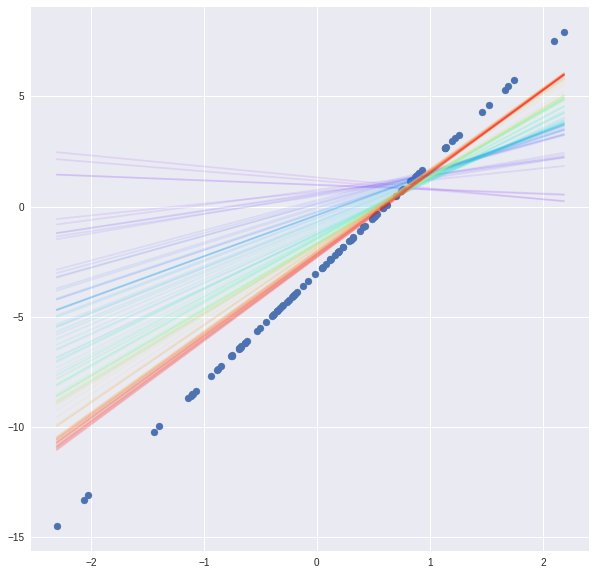

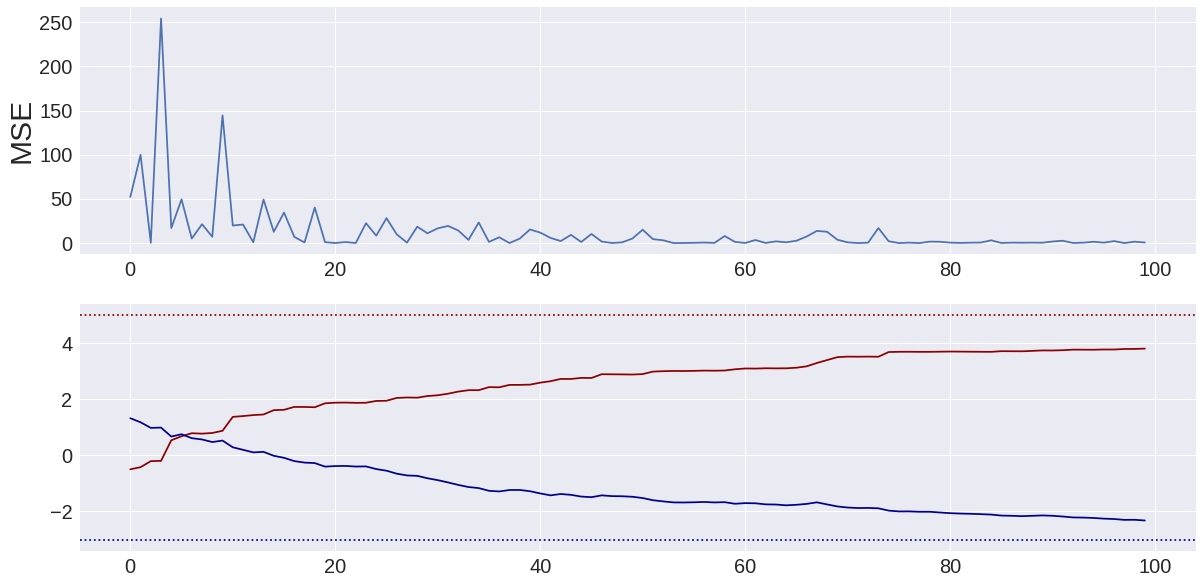

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
np.random.seed(1)
plt.style.use('seaborn')

# set parameters
N = 100
# learning rate
lr = 0.01 
t_w, t_b = 5, -3
# initial w,b
w, b = np.random.uniform(-3, 3, 2)

# generate dataset
x_data = np.random.randn(N, )
y_data = x_data * t_w + t_b
# noise
#y_data += 0.5*np.random.randn(N, )

cmap = cm.get_cmap('rainbow', lut=N)
fig, ax = plt.subplots(figsize=(10, 10))
ax. scatter(x_data, y_data)

x_range = np.array([x_data.min(), x_data.max()])
J_track = list()
w_track, b_track = list(), list()
# train model and visualize updated models
# x_data가 100개 만들어져있으니, 100번 update
for data_idx, (x, y) in enumerate(zip(x_data, y_data)):
  # w,b가 어떻게 변하는지 보기위해 list에 추가
  w_track.append(w)
  b_track.append(b)

  #visualize updated model
  y_range = w*x_range+ b
  ax.plot(x_range, y_range, color=cmap(data_idx), alpha=0.1)

  #forward propagation - prediction, loss cal
  pred = x*w + b
  J = (y - pred)**2
  J_track.append(J)

  #jacobians
  dJ_dpred = -2*(y - pred)
  dpred_dw = x
  dpred_db = 1

  #backpropagation
  dJ_dw = dJ_dpred * dpred_dw
  dJ_db = dJ_dpred * dpred_db

  #parameter update
  w = w - lr*dJ_dw
  # w = w + 2*lr*x*(y-pred)
  b = b - lr*dJ_db
  # b = b + 2*lr*(y-pred)

# visualize results
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
# loss의 변화
axes[0].plot(J_track)
axes[0].set_ylabel('MSE', fontsize=30)
axes[0].tick_params(labelsize=20)
# w,b가 어떻게 update되었는지
axes[1].plot(w_track, color = 'darkred')
axes[1].plot(b_track, color = 'darkblue')
# target w,b 표시
axes[1].axhline(y=t_w, color='darkred', linestyle=':')
axes[1].axhline(y=t_b, color='darkblue', linestyle=':')
axes[1].tick_params(labelsize=20)